In [1]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_theme()

In [2]:
sourceName = 'data/conll03/eng.train.src'
targetName = 'data/conll03/eng.train.trg'
testSrc = 'data/conll03/eng.testb.src'
testTrg = 'data/conll03/eng.testb.trg'

In [3]:
def countTags(filename):
    count = {}
    with open(filename, 'r') as file:
        for line in file:
            line = line.strip().split()
            for tag in line:
                if tag not in count:
                    count[tag] = 1
                else:
                    count[tag] += 1
    return count

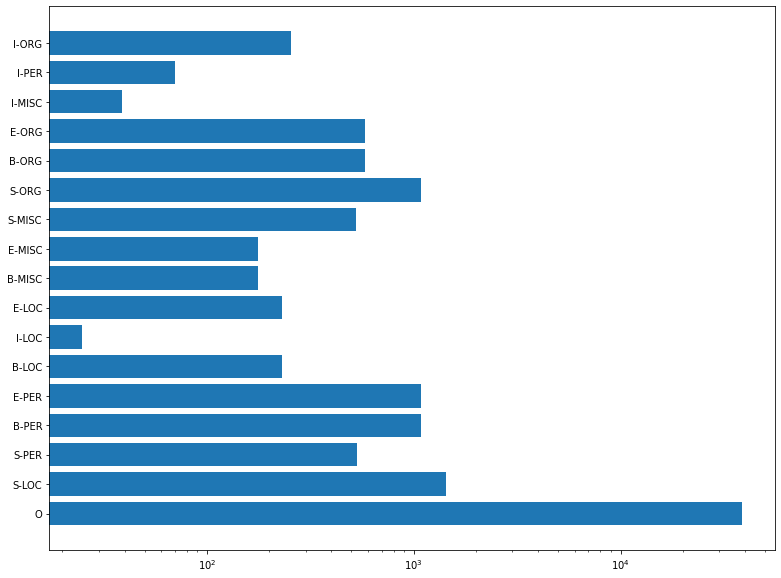

In [4]:
counts = countTags(testTrg)
x, y = zip(*counts.items())
fig, ax = plt.subplots(figsize=(13,10))
ax.barh(x, y)
plt.xscale('log')

Text(0, 0.5, 'frequencies')

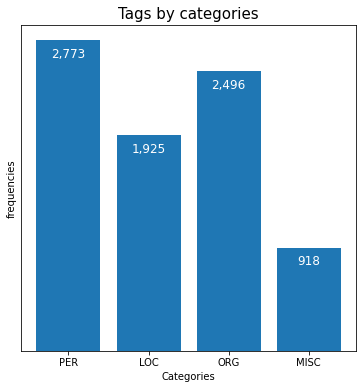

In [6]:
categories  = 'PER LOC ORG MISC'.split()
frequencies = [0 for c in categories]
for i, cat in enumerate(categories):
    for tag, tagCount in counts.items():
        if cat in tag:
            frequencies[i] += tagCount

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(categories, frequencies)
for px, py in zip(categories, frequencies):
    ax.text(px, py-150, f"{py:,}", color='white', ha="center", fontsize=12)
ax.set_yticks([])

ax.set_title("Tags by categories", fontsize=15)
ax.set_xlabel("Categories")
ax.set_ylabel("frequencies")